### 0.) Import necessary modules and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings("ignore")

### 1.)  Load and explore dataset, do necessary pre-processing and split the dataset into training set and test set with an appropriate ratio. Explain the steps that you have taken (e.g. show dataset size, dealing with missing values, feature exploration and representation, label distribution, split dataset etc).

In [2]:
# Load datasets
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
# Show dataset size
df.shape

(1197, 15)

In [4]:
# Show Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
# Show missing values
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
# The missing value
df['wip']

0       1108.0
1          NaN
2        968.0
3        968.0
4       1170.0
         ...  
1192       NaN
1193       NaN
1194       NaN
1195       NaN
1196       NaN
Name: wip, Length: 1197, dtype: float64

In [7]:
# Show the mean of 'wip'
wip_mean = df['wip'].mean()
wip_mean

1190.4659913169319

In [8]:
# Show the median of 'wip'
wip_median = df['wip'].median()
wip_median

1039.0

In [9]:
# Show the minimum and maximum value of 'wip'
print("Minimum of wip:", df['wip'].min())
print("Maximum of wip:", df['wip'].max())

Minimum of wip: 7.0
Maximum of wip: 23122.0


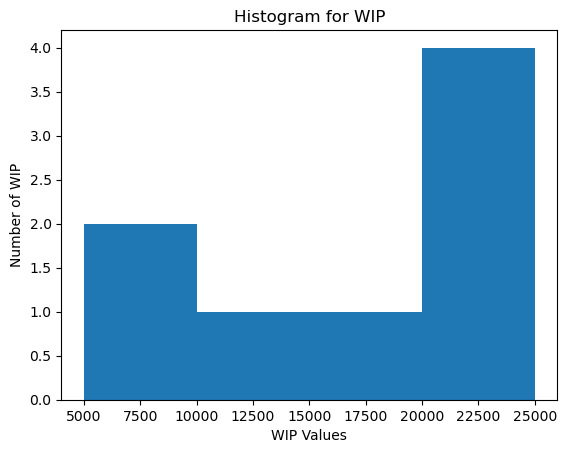

In [10]:
# Plotting data to choose between mean and median for wip

plt.title("Histogram for WIP")
plt.xlabel("WIP Values")
plt.ylabel("Number of WIP")

# Bins value between 5000 to 25000
bins = [5000, 10000, 15000, 20000, 25000]

# Create Histogram
plt.hist(df['wip'], bins=bins)

# Show Graph
plt.show()

In [11]:
# As our minimum value is 7, we will plot from 0 till its maximum

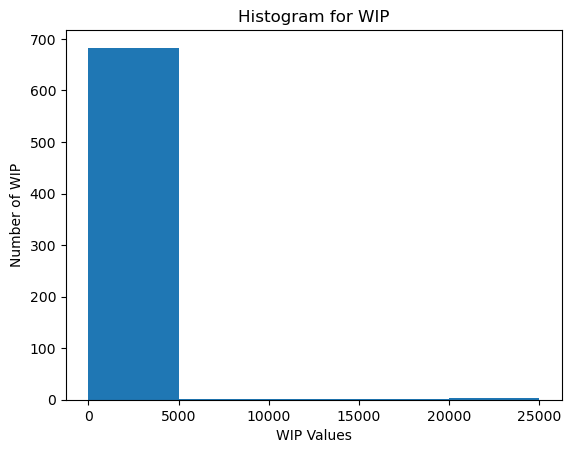

In [12]:
# Plotting data to choose between mean and median for wip

plt.title("Histogram for WIP")
plt.xlabel("WIP Values")
plt.ylabel("Number of WIP")

# Bins values between 0 to 25000
bins = [0, 5000, 10000, 15000, 20000, 25000]

# Create Histogram
plt.hist(df['wip'], bins=bins)

# Show Graph
plt.show()

In [13]:
# Based on the histrogram above, the wip value are mainly between 0 and
# 5000, therefore this wip is the right-skewed histogram
# Thus, we will use median for this wip feature

In [14]:
# Fill the missing values with median of wip
df['wip'].fillna(wip_median, inplace=True)
df['wip']

0       1108.0
1       1039.0
2        968.0
3        968.0
4       1170.0
         ...  
1192    1039.0
1193    1039.0
1194    1039.0
1195    1039.0
1196    1039.0
Name: wip, Length: 1197, dtype: float64

In [15]:
# Check missing values again
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [16]:
# Create Label Encoder
label_encoder = LabelEncoder()

In [17]:
# Encode Quarter, Department, and Day into Numerical data
quarter_encoded = label_encoder.fit_transform(df["quarter"])
department_encoded = label_encoder.fit_transform(df["department"])
day_encoded = label_encoder.fit_transform(df["day"])

df["quarter_int"] = quarter_encoded
df["department_int"] = department_encoded
df["day_int"] = day_encoded

In [18]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_int,department_int,day_int
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,2,3
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,0,1,3
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,2,3
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,2,3
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,2,3


In [19]:
# I have encoded Quarter, Department, and Day into Numerical data
# Because these three features are important for prediction

# However, date doesn't seem to be important bacause there are too many data which have the same date
# Even we make a prediction, it's impossible to tell why that's day worker have more productivity than other date
# Additionally, we already have Quarter and Day to replaced Date

In [20]:
# Rearrange quarter_int, department_int, and day_int to be after day
# for better data prediction

cols = list(df.columns)
new_cols = cols[:4] + cols[-3:] + cols[4:15]
df = df[new_cols]
df.head()

,date,quarter,department,day,quarter_int,department_int,day_int,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,0,1,3,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [21]:
# Save modified dataset
df.to_csv('modified_garments_worker_productivity.csv')

In [22]:
# dataset that we will work on
df.iloc[:, 4:]

,quarter_int,department_int,day_int,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,1,3,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,0,2,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,2,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,2,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,5,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,5,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,5,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,5,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [23]:
# Splitting dataset into training and testing data

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,4:-1], df.iloc[:,-1], test_size=0.30, random_state=42)

print("Train shape: ",X_train.shape)
print("Test shape: ",X_test.shape)

Train shape:  (837, 13)
Test shape:  (360, 13)


### 2.) Based on the training data, create three supervised machine learning (ML) models for predicting actual_productivity.

In [24]:
# There are many supervised machine learning algorithm.
# For the pupose of predicting actual_prodcutivity,
# We will use three supervised machine learning model including
# Linear Regression, Support Vector Machine Regression (SVR), and Decision Tree

In [25]:
# Linear Regression, Support Vector Machine Regression (SVR), and Decision Tree
linear_regressor = LinearRegression()
svm_regressor = SVR()
dt_regressor = DecisionTreeRegressor()

In [26]:
# Fit data into Linear Regression
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
# Fit data into Support Vector Machine Regression (SVR)
svm_regressor.fit(X_train, y_train)

SVR()

In [28]:
# Fit data into Decision Tree
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [29]:
# Predict testing data using Linear Regression
lr_y_preds = linear_regressor.predict(X_test)

In [30]:
# Predict testing data using Support Vector Machine Regression (SVR)
svr_y_preds = svm_regressor.predict(X_test)

In [31]:
# Predict testing data using Decision Tree
dtr_y_preds = dt_regressor.predict(X_test)

In [32]:
print("The prediction y using Linear Regression: ")
print(lr_y_preds)

The prediction y using Linear Regression: 
[0.64378956 0.84367    0.78215368 0.75068087 0.79824162 0.81126386
 0.61090586 0.61448606 0.69708413 0.76343871 0.73661316 0.8328558
 0.84286175 0.59128286 0.76083095 0.79674056 0.89486044 0.6315609
 0.55651621 0.7986514  0.90062832 0.70746502 0.83070361 0.83827663
 0.8031781  0.62611013 0.4407119  0.87869807 0.65891623 0.82494098
 0.79231213 0.7675283  0.83588292 0.72114375 0.76267553 0.70158838
 0.73557272 0.84682934 0.75420929 0.74224762 0.78117844 0.74035066
 0.69899199 0.78629915 0.75946342 0.75394316 0.68469609 0.85361469
 0.81575966 0.76636887 0.87072333 0.81148324 0.78312302 0.72405844
 0.79120086 0.74532268 0.7128221  0.68412978 0.83664378 0.46517936
 0.80502563 0.76323279 0.73830292 0.75771892 0.62461718 0.73471285
 0.75647855 0.80128528 0.73106208 0.69651637 0.79687245 0.72817871
 0.67215883 0.74311151 0.70170379 0.64835997 0.8643354  0.66064043
 0.81644487 0.77075462 0.86768792 0.77752252 0.85271825 0.79066006
 0.77285759 0.7496314

In [33]:
print("The prediction y using Support Vector Regression: ")
print(svr_y_preds)

The prediction y using Support Vector Regression: 
[0.67234304 0.72689995 0.77791834 0.77369325 0.77363077 0.69903059
 0.74332844 0.74333334 0.75821026 0.74081667 0.69258976 0.71147634
 0.73097192 0.7564447  0.75469711 0.77799105 0.76890422 0.7728568
 0.7231191  0.73428286 0.78041945 0.71988673 0.77676178 0.75649957
 0.76106449 0.73684247 0.7779195  0.78659725 0.75900797 0.77798703
 0.74478768 0.73792744 0.77239635 0.77528651 0.76862546 0.74925815
 0.77680509 0.74406233 0.74097006 0.7735832  0.75760389 0.76570527
 0.77364055 0.73003355 0.73673571 0.73572622 0.77359115 0.77371697
 0.66074158 0.77788911 0.69825984 0.76714992 0.77364019 0.74631338
 0.77364384 0.76172575 0.74319649 0.73510448 0.77798304 0.76787851
 0.77793778 0.77788158 0.74072049 0.76092545 0.71294655 0.77364205
 0.74941655 0.70690641 0.5708192  0.67339032 0.78982881 0.73031478
 0.71597155 0.65201633 0.73182155 0.77424193 0.70959859 0.74366299
 0.77800495 0.78421285 0.68679255 0.70626275 0.78894979 0.77793239
 0.76743624 

In [34]:
print("The prediction y using Decision Tree Regression: ")
print(dtr_y_preds)

The prediction y using Decision Tree Regression: 
[0.35444444 0.80003139 0.61625    0.5565625  0.68270833 0.61114054
 0.91220211 0.91220211 0.65019865 0.75039551 0.70050893 0.92564394
 0.80011582 0.98719697 0.90014152 0.99138889 1.00001855 0.50012336
 0.60022419 0.90032111 1.00001855 0.70071042 0.87008333 0.87555556
 0.75005085 0.36107143 0.75548611 1.00023041 0.28305449 0.84506944
 0.95018596 0.80040196 0.96675926 0.97186667 0.70025078 0.48792
 0.79675556 0.85043644 0.80040196 0.58604167 0.80030279 0.85050231
 0.87       0.90032111 0.75065101 0.80040196 0.5046875  0.91522917
 0.80040196 0.8805303  0.80098039 0.85044615 0.54072917 0.8
 0.3715625  0.65019865 0.37659722 0.75009835 0.940625   0.33797349
 0.59043561 0.93951389 0.52118    0.98098485 0.50080172 0.7018125
 0.80031864 0.75005085 0.43326316 0.70060526 0.80064381 0.44872222
 0.70048083 0.71220525 0.75054546 0.66068329 0.80023784 0.69996522
 0.91995454 0.80080631 0.8000345  1.00141667 0.85061053 0.8375947
 0.75051756 0.43326316 0

### 2.) a.) Report performance score using a suitable metric on the test data. Is it possible that the presented result is an underfitted or overfitted one? Justify.

In [35]:
# Suitable metrics for these three algorithms are 
# Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R-squared, and Explained Variance

def regression_performance(y_data, y_pred):
    mae = mean_absolute_error(y_data, y_pred)
    mse = mean_squared_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    r2 = r2_score(y_data, y_pred)
    ev = explained_variance_score(y_data, y_pred)
    
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')
    print(f'EV: {ev:.2f}')

In [36]:
# Performance score for Linear Regression
print('Linear Regression Peformance Metrics:')
regression_performance(y_test, lr_y_preds)

Linear Regression Peformance Metrics:
MAE: 0.11
MSE: 0.02
RMSE: 0.15
R2: 0.21
EV: 0.21


In [37]:
# Performance score for Support Vector Regression
print('Support Vector Regression Performance Metrics:')
regression_performance(y_test, svr_y_preds)

Support Vector Regression Performance Metrics:
MAE: 0.13
MSE: 0.03
RMSE: 0.17
R2: 0.05
EV: 0.05


In [38]:
# Performance score for Decision Tree Regression
print('Decision Tree Regression Performance Metrics:')
regression_performance(y_test, dtr_y_preds)

Decision Tree Regression Performance Metrics:
MAE: 0.09
MSE: 0.02
RMSE: 0.15
R2: 0.21
EV: 0.21


In [39]:
# Based on the result above, the performance metrics of these three models
# on testing data are pretty low which are below 0.2

In [40]:
# To understand whether it is underfitted or overfitted,
# we need to do performance metrics on training data as well

In [41]:
lr_y_train_preds = linear_regressor.predict(X_train)
svr_y_train_preds = svm_regressor.predict(X_train)
dtr_y_train_preds = dt_regressor.predict(X_train)

In [42]:
# Performance score for Linear Regression on training data
print('Linear Regression Peformance Metrics on training data:')
regression_performance(y_train, lr_y_train_preds)

Linear Regression Peformance Metrics on training data:
MAE: 0.11
MSE: 0.02
RMSE: 0.15
R2: 0.31
EV: 0.31


In [43]:
# Performance score for Support Vector Regression on training data
print('Support Vector Regression Performance Metrics on training data:')
regression_performance(y_train, svr_y_train_preds)

Support Vector Regression Performance Metrics on training data:
MAE: 0.13
MSE: 0.03
RMSE: 0.17
R2: 0.06
EV: 0.06


In [44]:
# Performance score for Decision Tree Regression on training data
print('Decision Tree Regression Performance Metrics on training data:')
regression_performance(y_train, dtr_y_train_preds)

Decision Tree Regression Performance Metrics on training data:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00
EV: 1.00


In [45]:
# Based on the comparison results from both training and testing data using three different machine learning
# algorithm and five performance metrics, we have seen that the performance are mostly similar between
# the prediction on the training data and on the testing data.
# This indicate that these prediction models are not overfitting or underfitting.

### 2.) b.) Justify different design decisions for each ML model used to answer this question.

In [46]:
# Refer to "Garment Industry Employee Productivity" report by CHANPUTHI TITH on section:
# "III.) Supervised Machine Learning Models for Prediction iii.) Design Decisions"

### 2.) c.) Have you optimised any hyper-parameters for each ML model? What are they? Why have you done that? Explain.

#### Linear Regression with optimised hyper-parameters

In [47]:
# Find the best parameters and score for linear regression
param_grid = {'fit_intercept': [True, False], 'copy_X': [True, False], 'positive': [True, False], 'n_jobs': [-1, 1]}

lr_gs = GridSearchCV(linear_regressor, param_grid, cv=10)
lr_gs.fit(X_train, y_train)

print("Best Parameters:", lr_gs.best_params_)
print("Best Score:", lr_gs.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}
Best Score: 0.223999179713792


In [48]:
# Show Linear Regression optimized hyperparameters on testing data
optimised_lr = LinearRegression(fit_intercept=False, copy_X=True, positive=False, n_jobs=-1)

optimised_lr.fit(X_train, y_train)
optimised_lr_y_pred = optimised_lr.predict(X_test)
optimised_lr_y_train_pred = optimised_lr.predict(X_train)

print("Linear Regression optimized hyperparameters on testing data:")
regression_performance(y_test, optimised_lr_y_pred)

Linear Regression optimized hyperparameters on testing data:
MAE: 0.11
MSE: 0.02
RMSE: 0.16
R2: 0.19
EV: 0.19


In [49]:
# Show Linear Regression optimized hyperparameters on training data
print("Linear Regression optimized hyperparameters on training data:")
regression_performance(y_train, optimised_lr_y_train_pred)

Linear Regression optimized hyperparameters on training data:
MAE: 0.10
MSE: 0.02
RMSE: 0.15
R2: 0.28
EV: 0.28


In [50]:
# For Linear Regression model, we have applied GridSearchCV to find the best
# parameters of fit_intercept, copy_X, positive, n_jobs

# As for L1 (Lasso) and L2 (Ridge), we cannot applied it here
# because the purpose of this task is to find the optimised hyper-parameters
# for Linear Regression model, not to optimised it with regularization

#### Support Vector (Machine) Regressor with optimised hyper-parameters

In [51]:
# Find the best parameters and score for decision tree

# param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1], 'kernel': ['linear', 'ploy', 'rbf']}

param_grid = {'kernel': ['poly', 'rbf']}

svr_gs = GridSearchCV(svm_regressor, param_grid, cv=10)
svr_gs.fit(X_train, y_train)

print("Best Parameters:", svr_gs.best_params_)
print("Best Score:", svr_gs.best_score_)

Best Parameters: {'kernel': 'poly'}
Best Score: 0.03837076541827544


In [52]:
# Show Support Vector (Machine) Regressor optimized hyperparameters on testing data
optimised_svr = SVR(kernel='poly')

optimised_svr.fit(X_train, y_train)
optimised_svr_y_pred = optimised_svr.predict(X_test)
optimised_svr_y_train_pred = optimised_svr.predict(X_train)

print("Support Vector (Machine) Regressor optimized hyperparameters on testing data:")
regression_performance(y_test, optimised_svr_y_pred)

Support Vector (Machine) Regressor optimized hyperparameters on testing data:
MAE: 0.12
MSE: 0.03
RMSE: 0.17
R2: 0.08
EV: 0.08


In [53]:
# Show Support Vector (Machine) Regressor optimized hyperparameters on training data
print("Support Vector (Machine) Regressor optimized hyperparameters on training data:")
regression_performance(y_train, optimised_svr_y_train_pred)

Support Vector (Machine) Regressor optimized hyperparameters on training data:
MAE: 0.13
MSE: 0.03
RMSE: 0.17
R2: 0.08
EV: 0.08


In [54]:
# For Support Vector (Machine) Regressor, we have applied GridSearchCV to find the best
# parameters of kernel between poly and rbf

# There are also different kernel such as 'linear' and different parameters 
# such as 'C' and 'epsilon' as well
# However, we are unable to run these "param_grid" code due to computational speed
# because SVM with Linear is time-consuming on this non-linear data
# and our dataset is larger and complexity as well

#### Decision Tree Regressor with optimised hyper-parameters

In [55]:
# Find the best parameters and score for decision tree
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
}

dt_gs = GridSearchCV(dt_regressor, param_grid, cv=10, scoring="neg_mean_squared_error")
dt_gs.fit(X_train, y_train)

print("Best parameters:", dt_gs.best_params_)
print("Best Score:", -dt_gs.best_score_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}
Best Score: 0.01812398883709076


In [56]:
# Show Decision Tree Regressor optimized hyperparameters on testing data

optimised_dtr = DecisionTreeRegressor(max_depth=7, random_state=42, min_samples_leaf=3, min_samples_split=8)

optimised_dtr.fit(X_train, y_train)
optimised_dtr_y_pred = optimised_dtr.predict(X_test)
optimised_dtr_y_train_pred = optimised_dtr.predict(X_train)

print("Decision Tree Regressor optimized hyperparameters on testing data:")
regression_performance(y_test, optimised_dtr_y_pred)

Decision Tree Regressor optimized hyperparameters on testing data:
MAE: 0.09
MSE: 0.02
RMSE: 0.15
R2: 0.29
EV: 0.29


In [57]:
# Show Decision Tree Regressor optimized hyperparameters on training data
print("Decision Tree Regressor optimized hyperparameters on training data:")
regression_performance(y_train, optimised_dtr_y_train_pred)

Decision Tree Regressor optimized hyperparameters on training data:
MAE: 0.07
MSE: 0.01
RMSE: 0.10
R2: 0.65
EV: 0.65


In [58]:
# For Decision Tree Regressor, we have applied GridSearchCV to find the best
# paramters of max-depth, min_samples_split, min_samples_leaf

# There also many other parameters as well such as criterion, max_features, 
# and max_leaf_nodes. However, to make it simple, we only used three parameters
# while max-depth is the important one

### 2.) d.) Finally, make a recommendation based on the reported results and justify it.

In [59]:
# Refer to "Garment Industry Employee Productivity" report by CHANPUTHI TITH on section:
# "III.) Supervised Machine Learning Models for Prediction v.) Recommendation"

### 3.) Analyse the importance of the features for predicting actual_productivity using two different approaches. Give statistical reasons of your findings.

#### Linear Regression Approach with Coefficient

In [60]:
# Show Top 3 Feature importance with Linear Regression Approach
abs_coef = abs(optimised_lr.coef_)
sorted_coef_idx = abs_coef.argsort()[::-1]
feature_importance = list(zip(X_train.columns[sorted_coef_idx][:3], abs_coef[sorted_coef_idx]))

print("Top 3 Feature Importance with Linear Regression Approach:")
print()
for feature, score in feature_importance:
    print(f"{feature}: {score:.4f}")

Top 3 Feature Importance with Linear Regression Approach:

targeted_productivity: 1.0146
no_of_style_change: 0.0355
department_int: 0.0303


Text(0.5, 1.0, 'Linear Regression Feature Coefficients After Optimization')

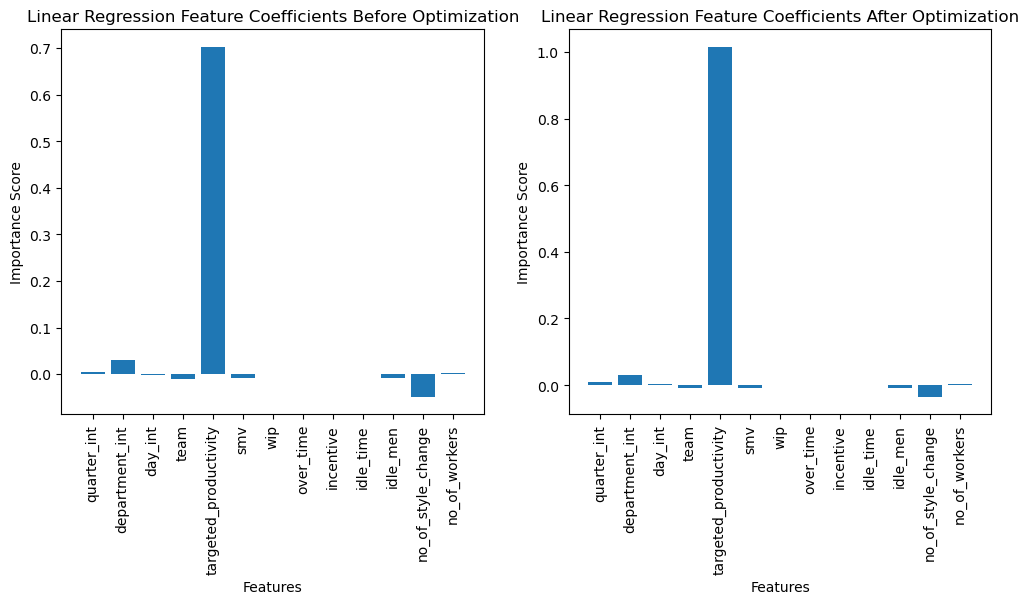

In [61]:
# Visualize Feature importance with Linear Regression Approach
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

axs[0].bar(X_train.columns, linear_regressor.coef_)
axs[0].set_xticklabels(X_train.columns, rotation=90)
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Importance Score")
axs[0].set_title("Linear Regression Feature Coefficients Before Optimization")


axs[1].bar(X_train.columns, optimised_lr.coef_)
axs[1].set_xticklabels(X_train.columns, rotation=90)
axs[1].set_xlabel("Features")
axs[1].set_ylabel("Importance Score")
axs[1].set_title("Linear Regression Feature Coefficients After Optimization")

#### Decision Tree Regressor Approach with Feature Importances

In [62]:
best_dt_regressor = dt_gs.best_estimator_
print(best_dt_regressor)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=8)


In [63]:
# Show Top 3 Feature importance with Decision Tree Regressor Approach
dt_importances = best_dt_regressor.feature_importances_
dt_importants = pd.Series(dt_importances, index=list(X_train.columns))

print("Top 3 Feature importance with Decision Tree Regressor Approach:")
print()
print(dt_importants.nlargest(3))

Top 3 Feature importance with Decision Tree Regressor Approach:

targeted_productivity    0.330527
incentive                0.190600
smv                      0.107340
dtype: float64


Text(0.5, 1.0, 'DT Regressor Feature Importances After Optimization')

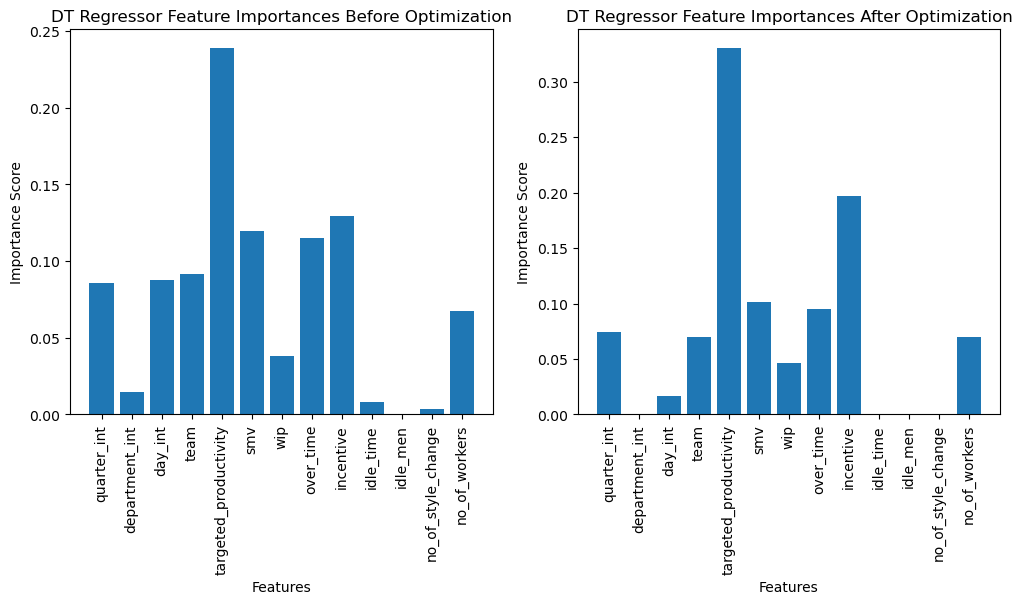

In [64]:
# Visualize Feature importance with Decision Tree Regressor Approach
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

axs[0].bar(X_train.columns, dt_regressor.feature_importances_)
axs[0].set_xticklabels(X_train.columns, rotation=90)
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Importance Score")
axs[0].set_title("DT Regressor Feature Importances Before Optimization")


axs[1].bar(X_train.columns, optimised_dtr.feature_importances_)
axs[1].set_xticklabels(X_train.columns, rotation=90)
axs[1].set_xlabel("Features")
axs[1].set_ylabel("Importance Score")
axs[1].set_title("DT Regressor Feature Importances After Optimization")

In [65]:
# Based on the visualization above from two different approach, we have seen that the most (or top 3) important
# features for "Actual Productivity of Garment Industry's employee" are targeted productivity, 
# no_of_style_change, and department by using Linear Regression approach with coefficient.
# With Decession Tree Regressor approach, feature importants are targeted productivity, incentive and smv.
# Targeted productivty remain the most important feature for both approaches.